<a href="https://colab.research.google.com/github/prastika/beginner/blob/main/dicoding%20RockPaperScissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prastika Indriyanti || prast.tika@gmail.com**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-27 16:08:48--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.61MB/s    in 4m 59s  

2021-05-27 16:13:48 (1.03 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
pip install split-folders tqdm

In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
import os
import shutil
import splitfolders

In [ ]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images/' #
if ('data_model' in os.listdir(base_dir)):
  shutil.rmtree(os.path.join(base_dir, 'data_model'))

splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images/',
                    output ='/tmp/rockpaperscissors/rps-cv-images/data_model',
                    seed=None, ratio=(.8,.2))

print('\n')
# BLOK ROCK
rock_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/rock') 
train_rock_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data_model/train/rock') 
val_rock_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data_model/val/rock') 

# BLOK PAPER
paper_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/paper')
train_paper_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data_model/train/paper')
val_paper_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data_model/val/paper')

# BLOK SCISSORS
scissors_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/scissors')
train_scissors_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data_model/train/scissors')
val_scissors_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data_model/val/scissors')

Copying files: 2188 files [00:00, 2851.27 files/s]

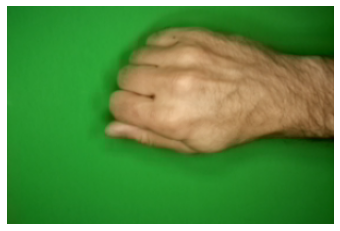

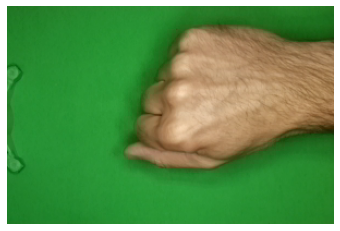

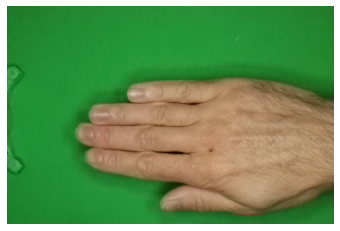

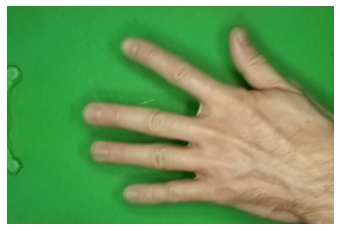

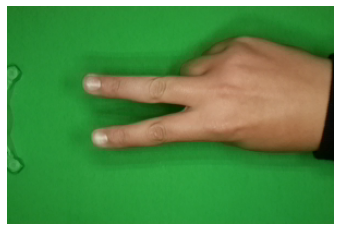

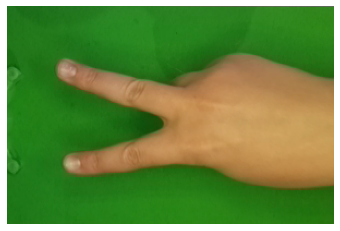

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

training_dir = "/tmp/rockpaperscissors/rps-cv-images/data_model/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_dir = "/tmp/rockpaperscissors/rps-cv-images/data_model/val"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	training_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	validation_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=28, steps_per_epoch=14,
    validation_data = validation_generator,
    verbose = 1,
    validation_steps=3)

model.save("rockpaperscissors.h5")

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________

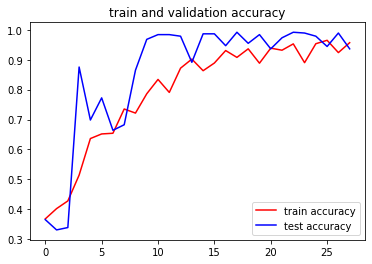

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='train accuracy')
plt.plot(epochs, val_acc, 'b', label='test accuracy')
plt.title('train and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

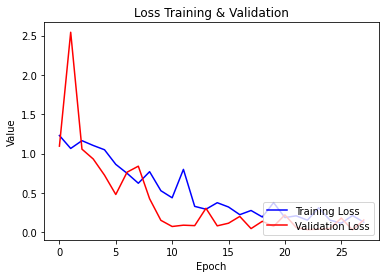

In [ ]:
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color = 'red')
plt.title('Loss Training & Validation')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

testing real case upload image

In [ ]:
from google.colab import files

In [ ]:
import numpy as np

In [ ]:
image_test = files.upload()

Saving paper.jpg to paper (1).jpg


In [ ]:
def predict(image_test):
  for fn in image_test .keys():
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
  
    print(fn)
    if classes[0,0] != 0:
      print('it is Paper!')
    elif classes[0,1] != 0:
      print('it is Rock!')
    else:
      print('it is Scissors!')

paper.jpg
it is Paper!


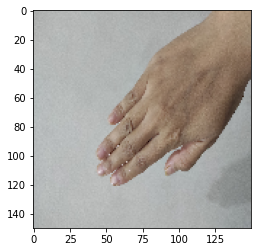

In [ ]:
predict(image_test)